In [128]:
import pandas as pd
import math

In [129]:
dataset = pd.read_csv('Housing.csv')

In [130]:
dataset

,price,area,bedrooms,stories
0,13300000,7420,4,3
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,2
...,...,...,...,...
540,1820000,3000,2,1
541,1767150,2400,3,1
542,1750000,3620,2,1
543,1750000,2910,3,1


In [131]:
# Normalisation of data
range_of_area = dataset['area'].max() - dataset['area'].min()
range_of_bedrooms = dataset['bedrooms'].max() - dataset['bedrooms'].min()
range_of_stories = dataset['stories'].max() - dataset['stories'].min()
range_of_price = dataset['price'].max() - dataset['price'].min()


x = (dataset['area'] - dataset['area'].min()) / range_of_area
y = (dataset['bedrooms'] - dataset['bedrooms'].min()) / range_of_bedrooms
z = (dataset['stories'] - dataset['stories'].min()) / range_of_stories
Y = (dataset['price'] - dataset['price'].min()) / range_of_price

In [132]:
Parametres = [0.7264, 0.1842, 0.5321, 0.9183, 0.3764, 0.6421, 0.2897, 0.8572] # Declaring list of given parametres

In [133]:
def func1(x): # function for the first term
    return max(0 , x)

In [134]:
def func2(x): # function for the second term
    return 1/(1+math.exp(-x))

In [135]:
def feed_forward(x , y ,z ,Parametres): 
    term1 = Parametres[6] * func1(x * Parametres[0] + y * Parametres[1] + z * Parametres[2])
    term2 = Parametres[7] * func2(x * Parametres[3] + y * Parametres[4] + z * Parametres[5])
    return term1 + term2

In [136]:
def feed_backward(x , y , z, Y , Parametres , learning_rate = 0.001 , epochs = 1000):
    n = len(Y) # total length of examples
    for iteration in range(epochs):
        Derivatives = [0] * 8 # List to store derivatives with respect to all Paramtres
        loss = 0
        for i in range(n):
            prediction_value = feed_forward(x[i] , y[i] , z[i] , Parametres) # get a prediction value
            
            error = 2 * (prediction_value - Y[i]) # Derivative of loss function with respect to function
            
            loss += (prediction_value - Y[i]) ** 2 # calculate loss of every example
            
            # Calculating Derivatives
            term1 = func1(x[i] * Parametres[0] + y[i] * Parametres[1] + z[i] * Parametres[2])
            term2 = func2(x[i] * Parametres[3] + y[i] * Parametres[4] + z[i] * Parametres[5])
            
            if term1 > 0:   # Condition of max function. If max returns value derivative -> 1 else 0
                term1 = 1
            else:
                term1 = 0
            
            derivative_secondterm = term2 * (1 - term2) # Derivative of 1/1+e^-x 
        
        
            Derivatives[0] += error * term1 * x[i] * Parametres[6] * 1 * 1   # local derivative wrt p1
            Derivatives[1] += error * term1 * y[i] * Parametres[6] * 1 * 1 # local derivative wrt p2
            Derivatives[2] += error * term1 * z[i] * Parametres[6] * 1 * 1  # local derivative wrt p3
            Derivatives[3] += error * derivative_secondterm * x[i] * Parametres[7] * 1 * 1  # local derivative wrt p4
            Derivatives[4] += error * derivative_secondterm * y[i] * Parametres[7] * 1 * 1  # local derivative wrt p5
            Derivatives[5] += error * derivative_secondterm * z[i] * Parametres[7] * 1 * 1  # local derivative wrt p6
            Derivatives[6] += error * term1 # local derivative wrt p7
            Derivatives[7] += error * term2 # local derivative wrt p8
        for j in range(8):
            Parametres[j] -= learning_rate * (Derivatives[j]/n) # update parametres
        if iteration % 100 == 0:
            print(f"Epoch {iteration}: Loss = {loss / n}") # Print loss after every 100 iterations

    return Parametres

In [137]:
updated_parameters = feed_backward(x, y, z, Y, Parametres, learning_rate=0.001 , epochs=1000)
print("Final Parametres " , updated_parameters)

Epoch 0: Loss = 0.1688516150871361
Epoch 100: Loss = 0.1263749991999839
Epoch 200: Loss = 0.09674449252797176
Epoch 300: Loss = 0.07588710602269397
Epoch 400: Loss = 0.06114069951595471
Epoch 500: Loss = 0.050707139700260605
Epoch 600: Loss = 0.04334197799187637
Epoch 700: Loss = 0.038169008031567114
Epoch 800: Loss = 0.03456416251345565
Epoch 900: Loss = 0.03207980427480477
Final Parametres  [0.7178019940009743, 0.16978509129529437, 0.5215086875390879, 0.9048974489083733, 0.3513748516836149, 0.6269986842842331, -0.10555613225050588, 0.6154125400533389]


![WhatsApp Image 2025-02-18 at 10.41.23 PM.jpeg](<attachment:WhatsApp Image 2025-02-18 at 10.41.23 PM.jpeg>)
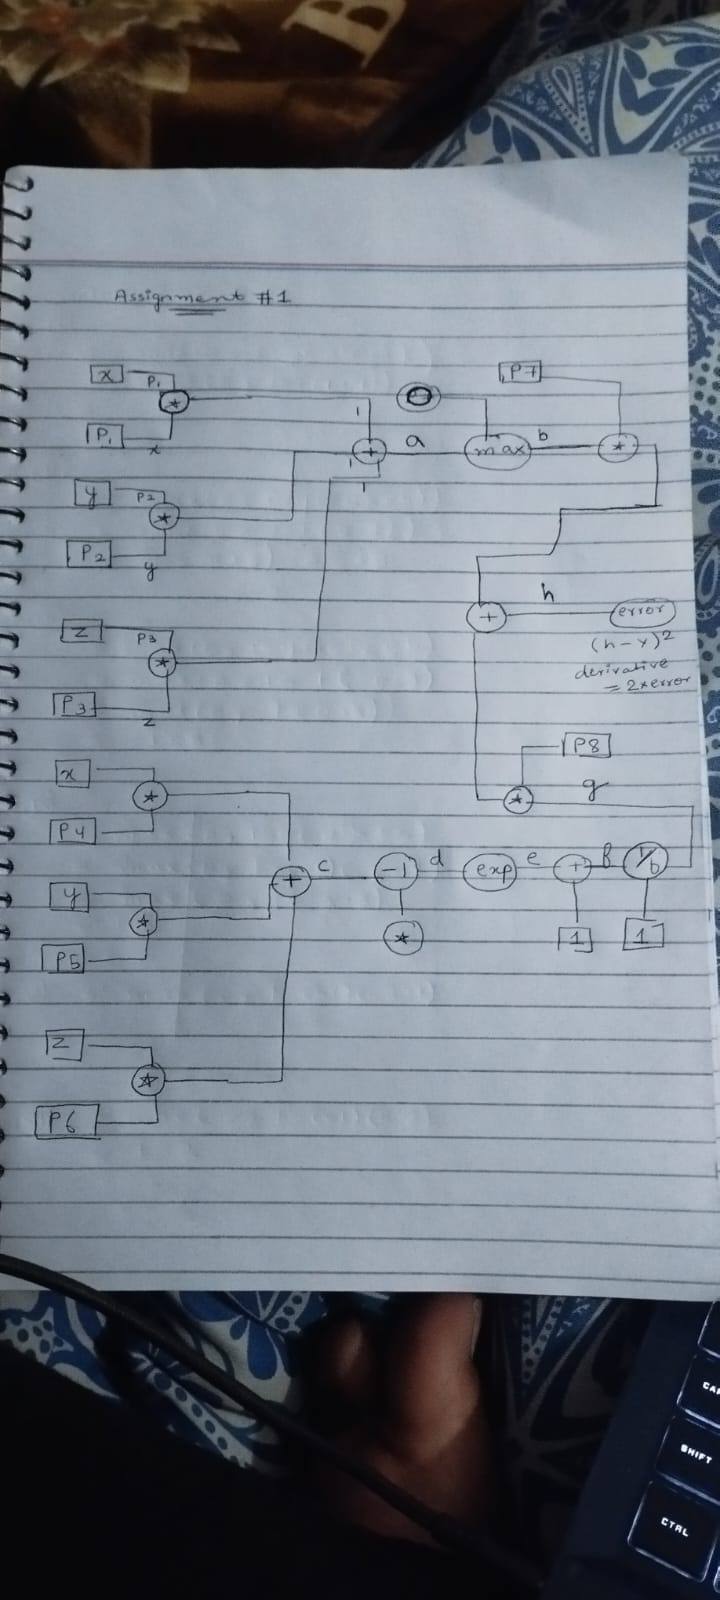